<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#ROC-Curve---Receiver-Operating-Characteristic-Curve" data-toc-modified-id="ROC-Curve---Receiver-Operating-Characteristic-Curve-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>ROC Curve - Receiver Operating Characteristic Curve</a></span><ul class="toc-item"><li><span><a href="#What's-our-&quot;worst&quot;-kind-of-classifier?" data-toc-modified-id="What's-our-&quot;worst&quot;-kind-of-classifier?-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>What's our "worst" kind of classifier?</a></span></li><li><span><a href="#Evaluating-Our-Model" data-toc-modified-id="Evaluating-Our-Model-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Evaluating Our Model</a></span><ul class="toc-item"><li><span><a href="#Looking-at-Just-the-Logistic-Regression" data-toc-modified-id="Looking-at-Just-the-Logistic-Regression-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Looking at Just the Logistic Regression</a></span></li><li><span><a href="#What-Distributions-Would-Work-Well-in-Classifying?" data-toc-modified-id="What-Distributions-Would-Work-Well-in-Classifying?-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>What Distributions Would Work Well in Classifying?</a></span></li><li><span><a href="#Defining-the-Threshold" data-toc-modified-id="Defining-the-Threshold-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Defining the Threshold</a></span></li></ul></li><li><span><a href="#Graph-Interpretation" data-toc-modified-id="Graph-Interpretation-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Graph Interpretation</a></span></li><li><span><a href="#Code-Example" data-toc-modified-id="Code-Example-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Code Example</a></span></li></ul></li><li><span><a href="#AUC---Area-Under-the-Curve" data-toc-modified-id="AUC---Area-Under-the-Curve-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>AUC - Area Under the Curve</a></span><ul class="toc-item"><li><span><a href="#Example-of-ROC-Curve-&amp;-AUC" data-toc-modified-id="Example-of-ROC-Curve-&amp;-AUC-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Example of ROC Curve &amp; AUC</a></span></li></ul></li></ul></div>

We have to consider how well we can just "guess" a classifier

Compare False Positive rate vs True Positive rate!

# ROC Curve - Receiver Operating Characteristic Curve

## What's our "worst" kind of classifier?

(Just guessing)

Note a bad classifier who always guesses wrong is an **amazing** classifier! 
> (Do the opposite of the person who hates all of your movies you love)

## Evaluating Our Model

### Looking at Just the Logistic Regression

Imagine we have a logistic regression (classifier):
 - Turn a continuous feature to binary prediction


[**What's the threshold?**](app.ziteboard.com)

### What Distributions Would Work Well in Classifying?

![](images/roc_crossover.png)

### Defining the Threshold

![](images/auc_rates.png)

## Graph Interpretation

False Positive Rate vs True Positive Rate → for each threshold

![](images/roc_comparison.png)

In [1]:
# Interactive ROC curve
from IPython.display import IFrame
IFrame('http://www.navan.name/roc/', width=900, height=600)

## Code Example

In [1]:
# Based on code from: 
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from scipy import interp

In [3]:
# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
X, y = datasets.load_iris(return_X_y=True)

# Shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = LogisticRegression(fit_intercept = False, C = 1e12, solver='lbfgs', multi_class='multinomial')
y_score = classifier.fit(X_train, y_train).decision_function(X_test)


# Binarize the output
y_test = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test.shape[1]

In [7]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

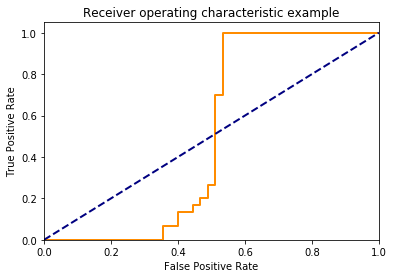

In [8]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])



plt.figure()
lw = 2
class_pt = 1
plt.plot(fpr[class_pt], tpr[class_pt], color='darkorange',
         lw=lw)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.show()

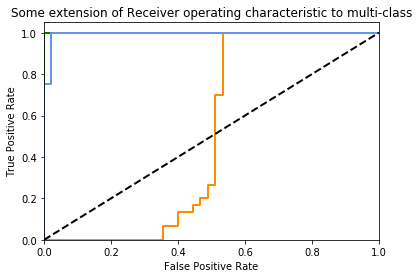

In [5]:
# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

# Plot all ROC curves
plt.figure()


colors = cycle(['green', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw)

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.show()


How do we quantify this; what is a better classification model?

# AUC - Area Under the Curve

A way for us to compare models' performances

## Example of ROC Curve & AUC

In [9]:
# Based on code from: 
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], thresholds = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    print(thresholds)
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

[ 1.37991331  0.37991331  0.24966175  0.19599366  0.18869727  0.17642852
  0.12163662  0.12127427  0.11801481  0.06910059 -0.01116192 -0.02392675
 -0.03259341 -0.04953425 -0.06196433 -0.07856729 -0.11107635 -0.1906155
 -0.19299299 -0.23036784 -0.25045747 -1.11907501]
[ 1.18264917  0.18264917 -0.04226738 -0.06436533 -0.08425378 -0.13384038
 -0.13784913 -0.21918849 -0.24059516 -0.24506467 -0.2653183  -0.2863326
 -0.29572764 -0.30270719 -0.31125083 -0.36698232 -0.39894364 -0.43228203
 -0.46354017 -0.47617037 -0.48759987 -0.5611945  -0.56572577 -0.60044961
 -0.62483455 -0.62804881 -0.63144366 -0.63705856 -0.70826295 -0.71470221
 -0.73611276 -0.7579771  -0.78971942 -0.83392076 -0.84787471 -1.0107504 ]
[ 1.58423201  0.58423201  0.21326435  0.12967625  0.04838688  0.02530178
  0.02199789  0.02046723  0.00856393  0.00767521 -0.01186087 -0.05831557
 -0.07455313 -0.10238744 -0.10551977 -0.11058011 -0.12051204 -0.2039252
 -0.21662877 -0.21682409 -0.22759345 -0.2292247  -0.23302033 -0.27802284
 -0

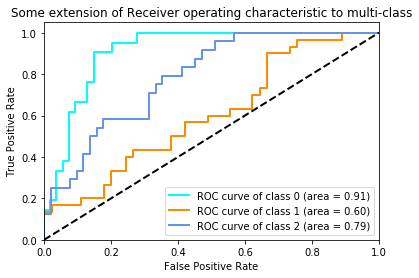

In [7]:
# Plot all ROC curves
plt.figure()

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()